# Cancer Prediction- 


### Problem Statement:
The objective of the dataset is to predict whether Predict whether the cancer is benign or malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

### Data Definition:
Input variables:

1) id (id number)

2) radius_mean: mean of distances from center to points on the perimeter

3) texture_mean: standard deviation of gray-scale values

4) perimeter_mean: mean size of the core tumor

5) area_mean: has housing loan? (categorical: 'no','yes','unknown')

6) smoothness_mean: mean of local variation in radius lengths

7) compactness_mean: mean of perimeter^2 / area - 1.0

8) concavity_mean: mean of severity of concave portions of the contour

9) concave points_mean: mean for number of concave portions of the contour

10) symmetry_mean:

11) fractal_dimension_mean: mean for "coastline approximation" - 1

12) radius_se: standard error for the mean of distances from center to points on the perimeter

13) texture_se: standard error for standard deviation of gray-scale values

14) perimeter_se:

15) area_se:

16) smoothness_se: standard error for local variation in radius lengths

17) compactness_se: standard error for perimeter^2 / area - 1.0

18) concavity_se: standard error for severity of concave portions of the contour

19) concave points_se: standard error for number of concave portions of the contour

20) symmetry_se:

21) fractal_dimension_se: standard error for "coastline approximation" - 1

22) radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

23) texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

24) perimeter_worst:

25) area_worst:

26) smoothness_worst: "worst" or largest mean value for local variation in radius lengths

27) compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

28) concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

29) concave points_worst: "worst" or largest mean value for number of concave portions of the contour

30) symmetry_worst:

31) fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

Output variable (desired target):

32) diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [85]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Datase

In [86]:
df1=df.copy()
df1.shape

(569, 33)

In [87]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Checking for Data Types

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [89]:
df1.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

<b>1. For getting the statistical summary of numerical variables we use the describe()

In [90]:
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the radius_mean ranges from 6.98 to 28.11, with mean 14.12

<b>2. For getting the statistical summary of categorical features we use the describe(include = object)

In [91]:
df1.describe(include = object)

,diagnosis
count,569
unique,2
top,B
freq,357


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'unique_id'<br></b>
count: Number of observations = 569<br>
unique: Number of unique classes in the column = 2 classes<br>
top: The most occurring class = B<br>
frequency: Frequency of the most repeated class; out of 569 observations diagnosis has a frequency of 357<br>

### Checking For Null Values & Duplicates

In [92]:
df1.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [93]:
df1.drop('Unnamed: 32',axis=1,inplace=True)
df1.shape

(569, 32)

In [94]:
df1.duplicated().sum()

0

#### Removing Extra variable

In [95]:
df1['id'].nunique()

569

In [96]:
df1.drop('id',axis=1,inplace=True)
df1.shape

(569, 31)

In [97]:
df1.dtypes.value_counts()

float64    30
object      1
dtype: int64

### Univariate Data Analysis

In [98]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64

texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64

perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64

area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: area_mean, Length: 539, dtype: int64

smoothness_mean
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: smoothness_mean, Length: 474, dty

In [99]:
df1_numerical= df1.select_dtypes(include='number')

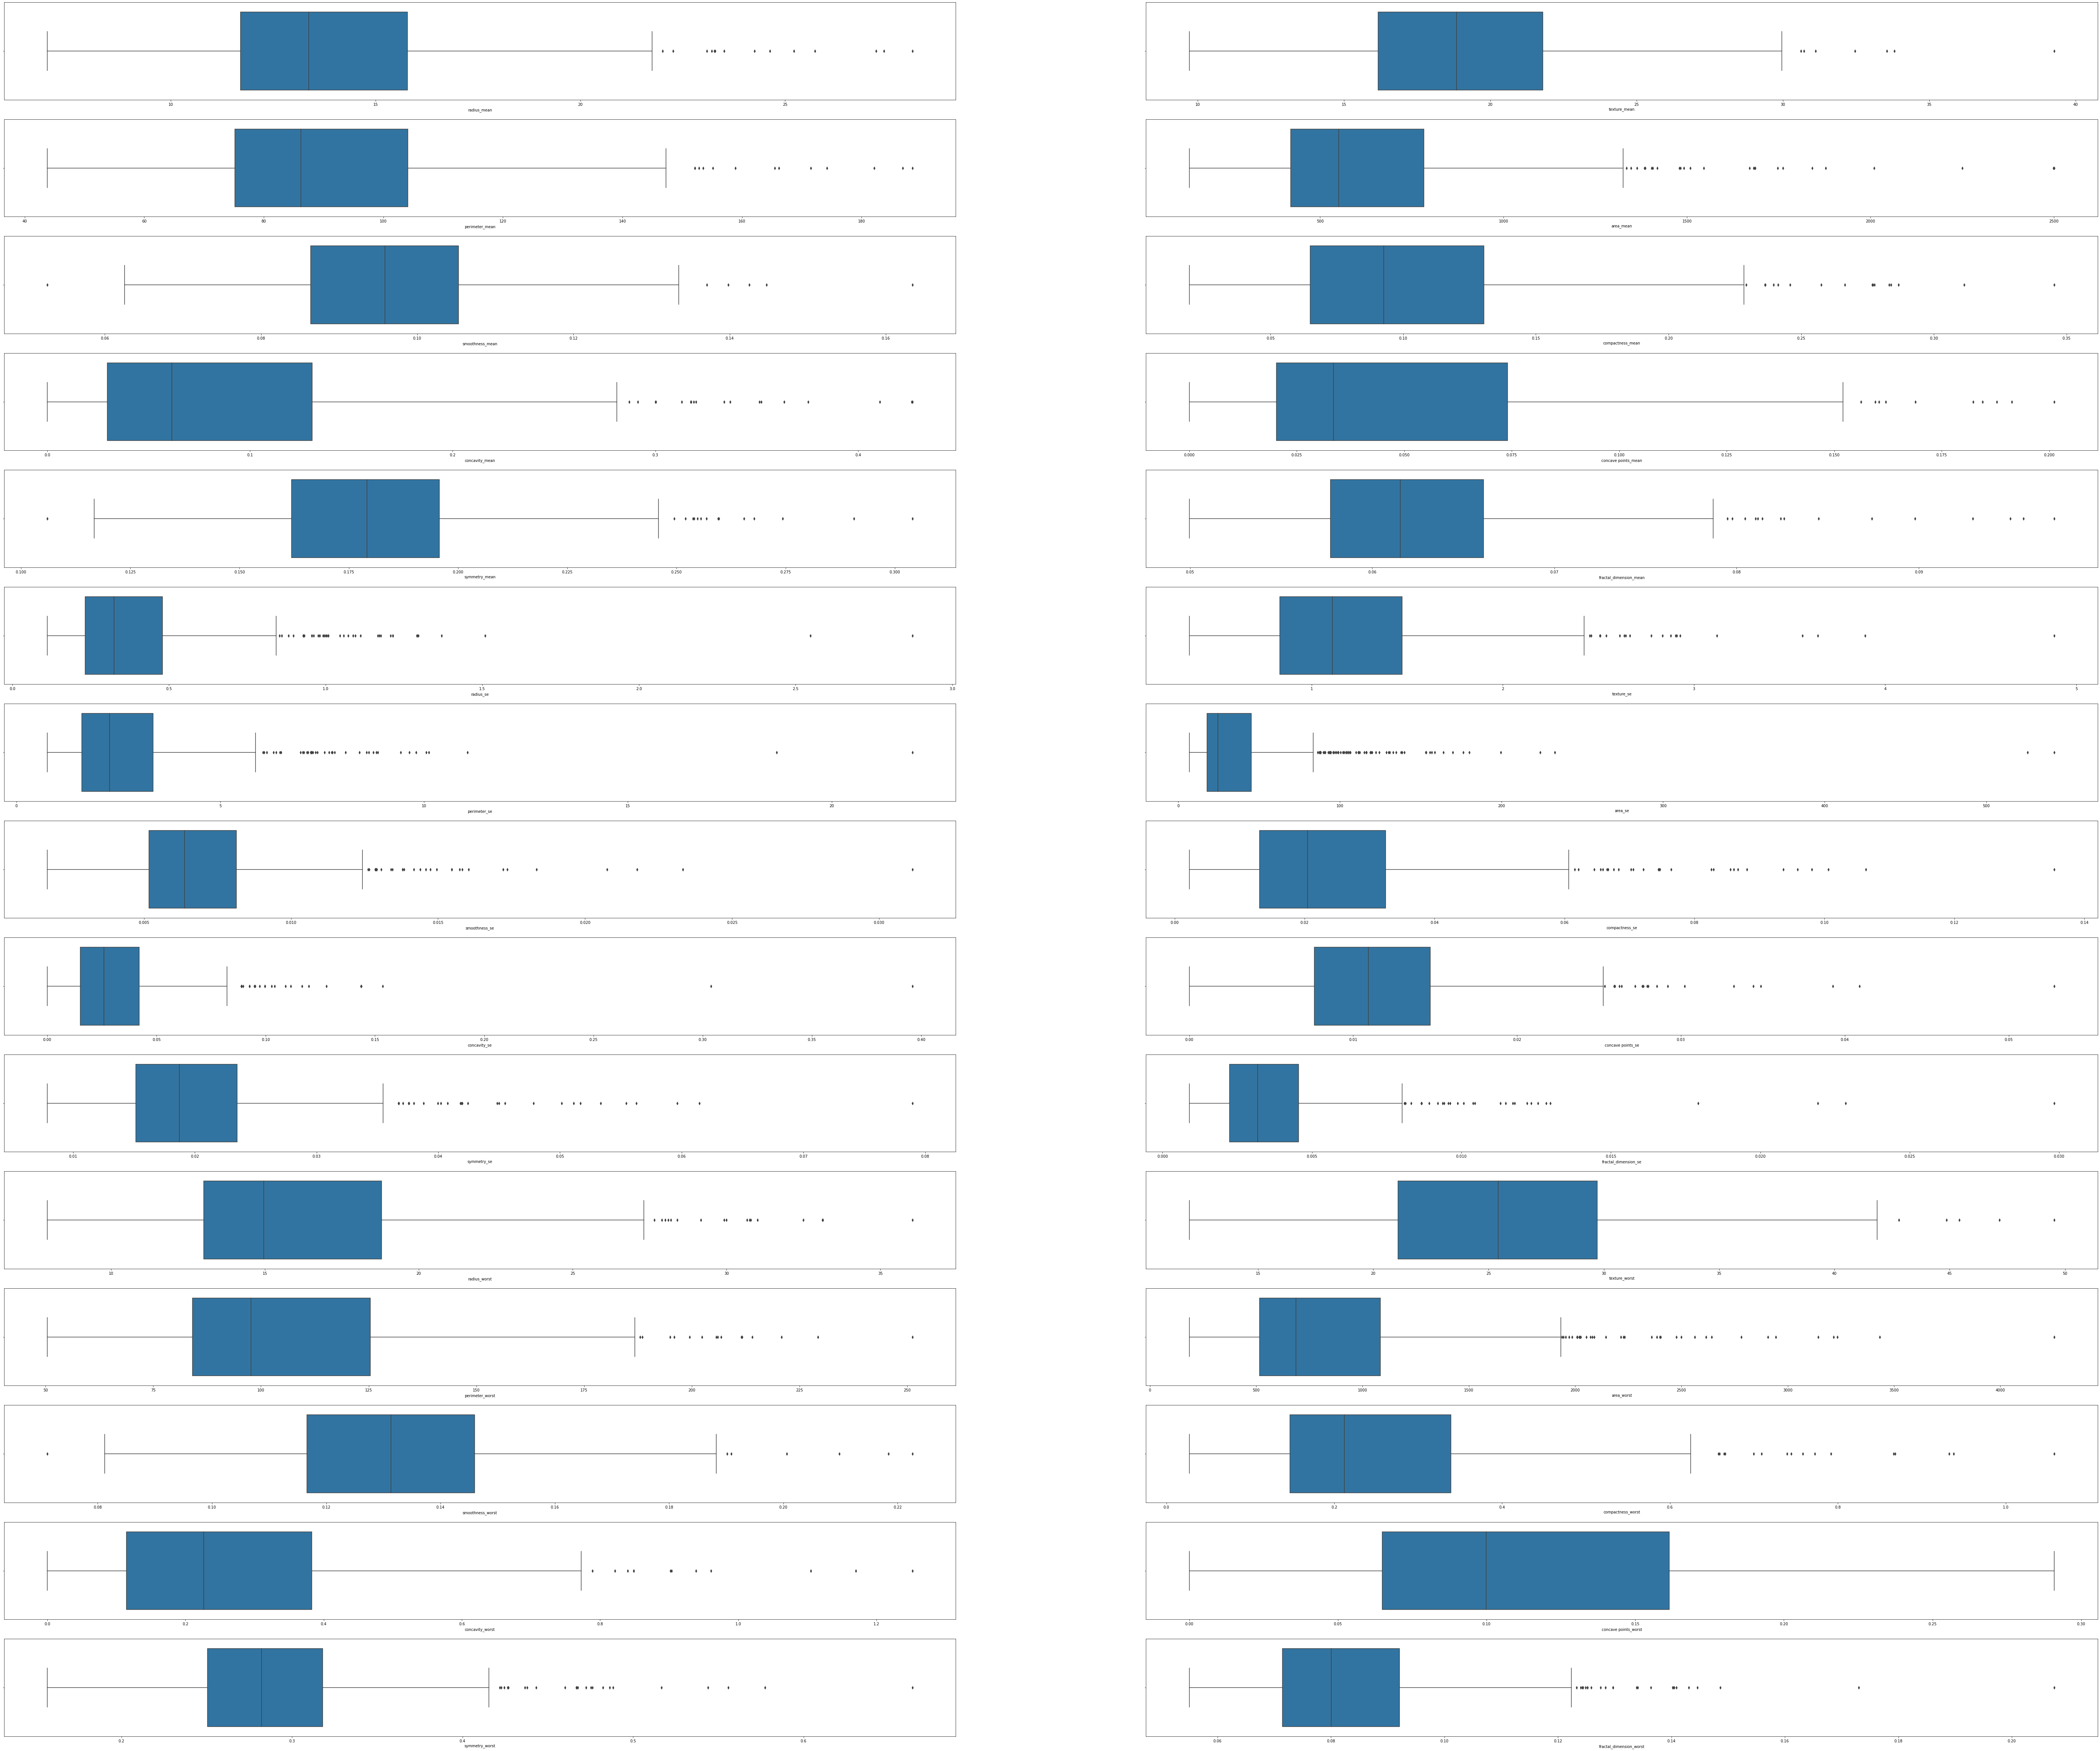

In [100]:
fig, ax = plt.subplots(nrows=15, ncols=2, figsize = (100, 85))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

- We can see presence of outliers

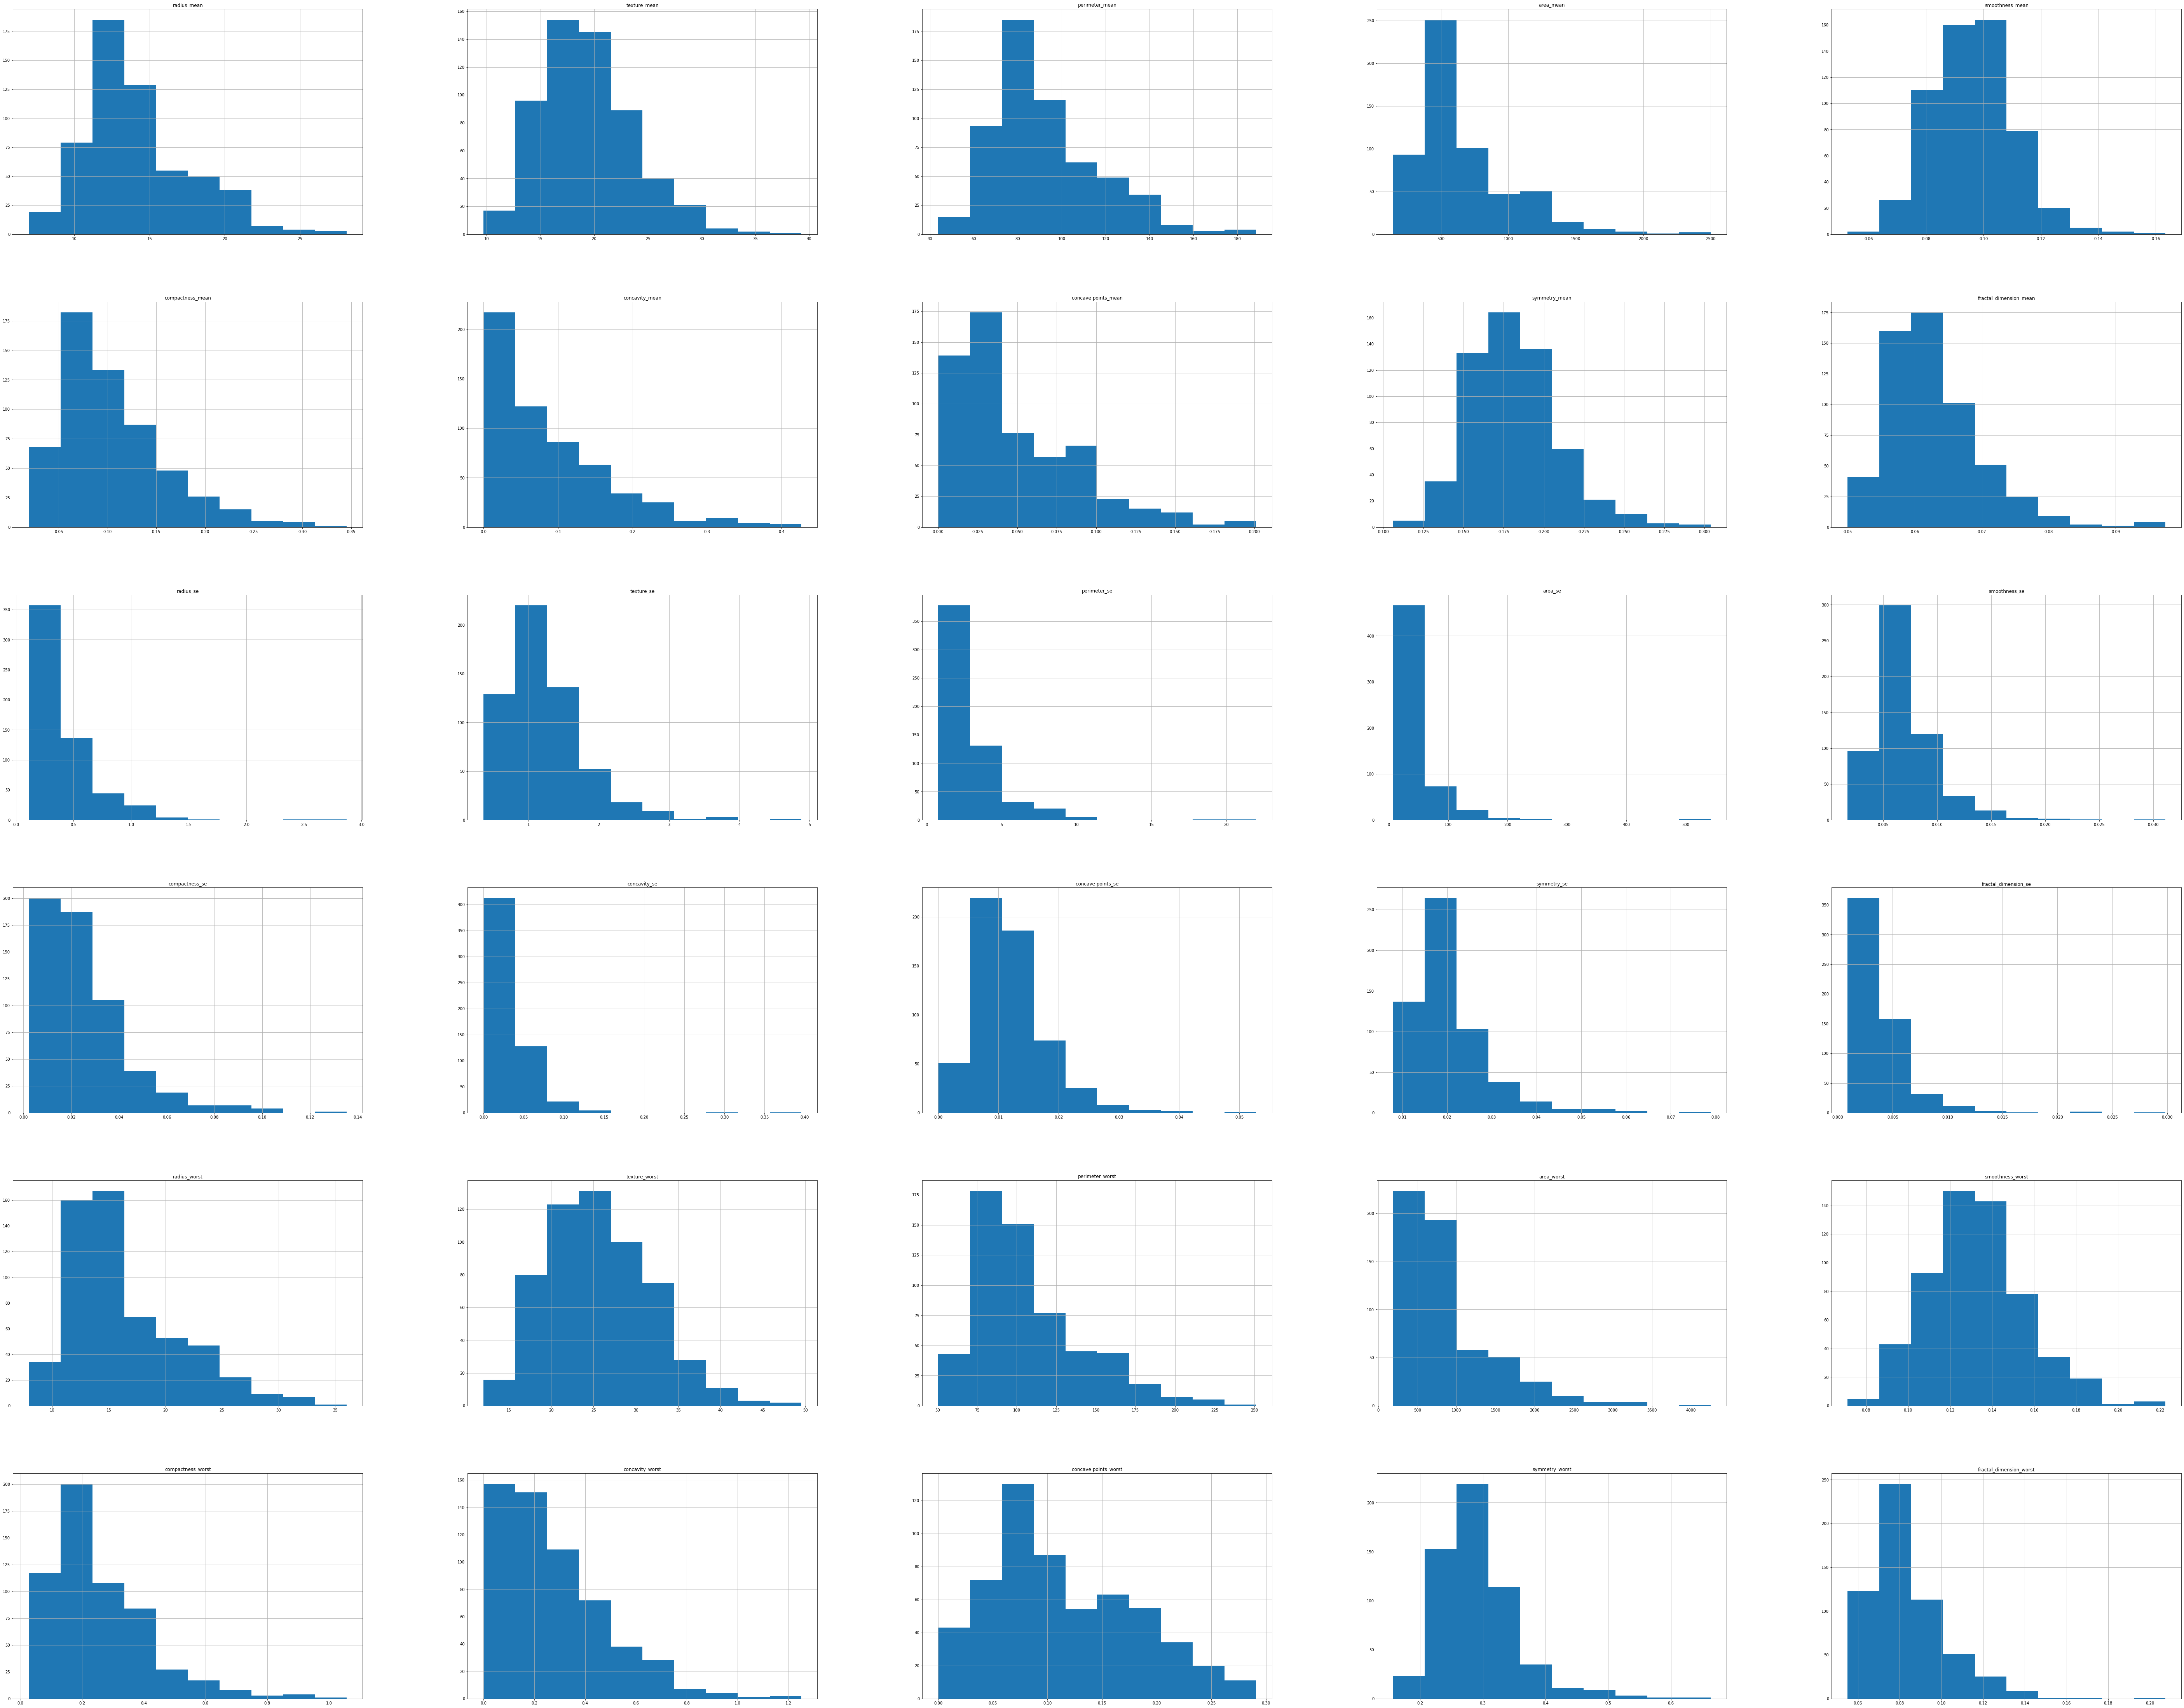

In [101]:
a=df1_numerical.hist(figsize=(100,80))

### Understanding Target variable

In [102]:
df1_categorical= df1.select_dtypes(exclude='number')
df1_categorical.columns

Index(['diagnosis'], dtype='object')

In [103]:
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

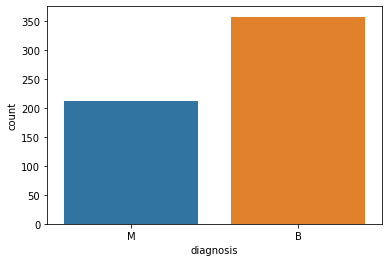

In [104]:
sns.countplot(x=df1['diagnosis'])
plt.show()

### Outlier Treatment

In [105]:
df1.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981000,8.458360,8.728880,9.029520,13.370000,21.552400,22.794800,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,10.930400,12.188000,12.711200,18.840000,28.209600,29.315600,30.652000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,53.827600,55.475200,58.798800,86.240000,142.988000,152.100000,165.724000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,215.664000,232.124000,246.396000,551.100000,1418.520000,1625.360000,1786.600000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.068654,0.070126,0.073512,0.095870,0.123696,0.126724,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.033351,0.035884,0.037663,0.092630,0.227452,0.240688,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.000000,0.000000,0.001489,0.061540,0.286856,0.317528,0.351688,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.000000,0.000000,0.003130,0.033500,0.146664,0.150292,0.164208,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.129508,0.134936,0.137308,0.179200,0.239796,0.253188,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.051504,0.052473,0.053072,0.061540,0.078173,0.080831,0.085438,0.09744


#### Handling Outliers

In [106]:
def outlier_handling(x):
    x = x.clip(upper = x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.92))
    return x

In [107]:
num_cols = [i for i in df1.columns if df1[i].dtypes!='object']
print(num_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [108]:
df1[num_cols] = df1[num_cols].apply(outlier_handling)

In [109]:
df1.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.970612,25.624543,131.992070,1246.818699,0.116561,0.189430,0.217918,0.110467,0.220696,0.073578,...,24.437372,34.657817,162.784513,1802.475501,0.165430,0.488405,0.614455,0.217191,0.373517,0.110179
std,0.489092,0.739714,3.564078,64.306461,0.001896,0.010037,0.018413,0.008031,0.006025,0.001356,...,0.735925,0.886286,6.071589,128.466600,0.003800,0.038045,0.031961,0.008469,0.017807,0.004355
min,19.854800,25.431200,131.156000,1232.240000,0.116112,0.186912,0.213556,0.108448,0.219248,0.073250,...,24.259200,34.437200,161.312000,1771.200000,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
1%,19.854800,25.431200,131.156000,1232.240000,0.116112,0.186912,0.213556,0.108448,0.219248,0.073250,...,24.259200,34.437200,161.312000,1771.200000,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
2%,19.854800,25.431200,131.156000,1232.240000,0.116112,0.186912,0.213556,0.108448,0.219248,0.073250,...,24.259200,34.437200,161.312000,1771.200000,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
3%,19.854800,25.431200,131.156000,1232.240000,0.116112,0.186912,0.213556,0.108448,0.219248,0.073250,...,24.259200,34.437200,161.312000,1771.200000,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
50%,19.854800,25.431200,131.156000,1232.240000,0.116112,0.186912,0.213556,0.108448,0.219248,0.073250,...,24.259200,34.437200,161.312000,1771.200000,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
97%,21.552400,28.209600,142.988000,1418.520000,0.123696,0.227452,0.286856,0.146664,0.239796,0.078173,...,27.296400,38.043200,184.584000,2231.800000,0.178888,0.616184,0.723708,0.250796,0.436216,0.125200
98%,22.605872,29.306384,152.100000,1596.790400,0.126355,0.240296,0.317482,0.150223,0.252796,0.080698,...,28.276016,39.233728,195.368640,2486.011200,0.185182,0.679567,0.779458,0.258237,0.467287,0.131420


### Correlation

In [110]:
corr = df1.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.044532,0.981766,0.991609,0.063424,0.302540,0.531875,0.695312,0.094988,-0.047470,...,0.830932,0.000599,0.840886,0.822314,-0.030528,0.114512,0.166919,0.529120,-0.003163,-0.032658
texture_mean,0.044532,1.000000,0.047883,0.042229,-0.047980,0.042459,0.044072,0.052104,-0.012862,-0.061735,...,0.106175,0.775205,0.123813,0.102803,0.014275,0.115824,0.085430,0.061466,-0.001783,0.087106
perimeter_mean,0.981766,0.047883,1.000000,0.963209,0.101890,0.364449,0.586477,0.751125,0.148162,-0.015042,...,0.812437,-0.004891,0.845919,0.796131,-0.027560,0.159444,0.215814,0.576950,0.038672,-0.020542
area_mean,0.991609,0.042229,0.963209,1.000000,0.053499,0.270318,0.502630,0.646473,0.068357,-0.051326,...,0.842624,0.002684,0.848991,0.842102,-0.030042,0.083022,0.139221,0.494796,-0.022712,-0.046342
smoothness_mean,0.063424,-0.047980,0.101890,0.053499,1.000000,0.393935,0.241334,0.202535,0.357083,0.349040,...,0.029580,0.026462,0.060890,0.017639,0.524501,0.208729,0.192078,0.161981,0.235924,0.260599
compactness_mean,0.302540,0.042459,0.364449,0.270318,0.393935,1.000000,0.651550,0.549628,0.516720,0.422022,...,0.251173,0.096495,0.351835,0.225281,0.249985,0.632447,0.565898,0.597147,0.369188,0.387697
concavity_mean,0.531875,0.044072,0.586477,0.502630,0.241334,0.651550,1.000000,0.759014,0.375724,0.275570,...,0.422397,0.023992,0.502338,0.408067,0.060765,0.351359,0.586678,0.607328,0.198931,0.161759
concave points_mean,0.695312,0.052104,0.751125,0.646473,0.202535,0.549628,0.759014,1.000000,0.344285,0.090898,...,0.558447,-0.009545,0.634046,0.537447,-0.008386,0.260622,0.321381,0.690457,0.175810,0.039436
symmetry_mean,0.094988,-0.012862,0.148162,0.068357,0.357083,0.516720,0.375724,0.344285,1.000000,0.324881,...,0.076733,0.009735,0.133260,0.053786,0.101939,0.314948,0.281480,0.375909,0.445308,0.206856
fractal_dimension_mean,-0.047470,-0.061735,-0.015042,-0.051326,0.349040,0.422022,0.275570,0.090898,0.324881,1.000000,...,-0.044679,0.009021,-0.014557,-0.042901,0.303584,0.244357,0.340259,0.161282,0.255508,0.506492


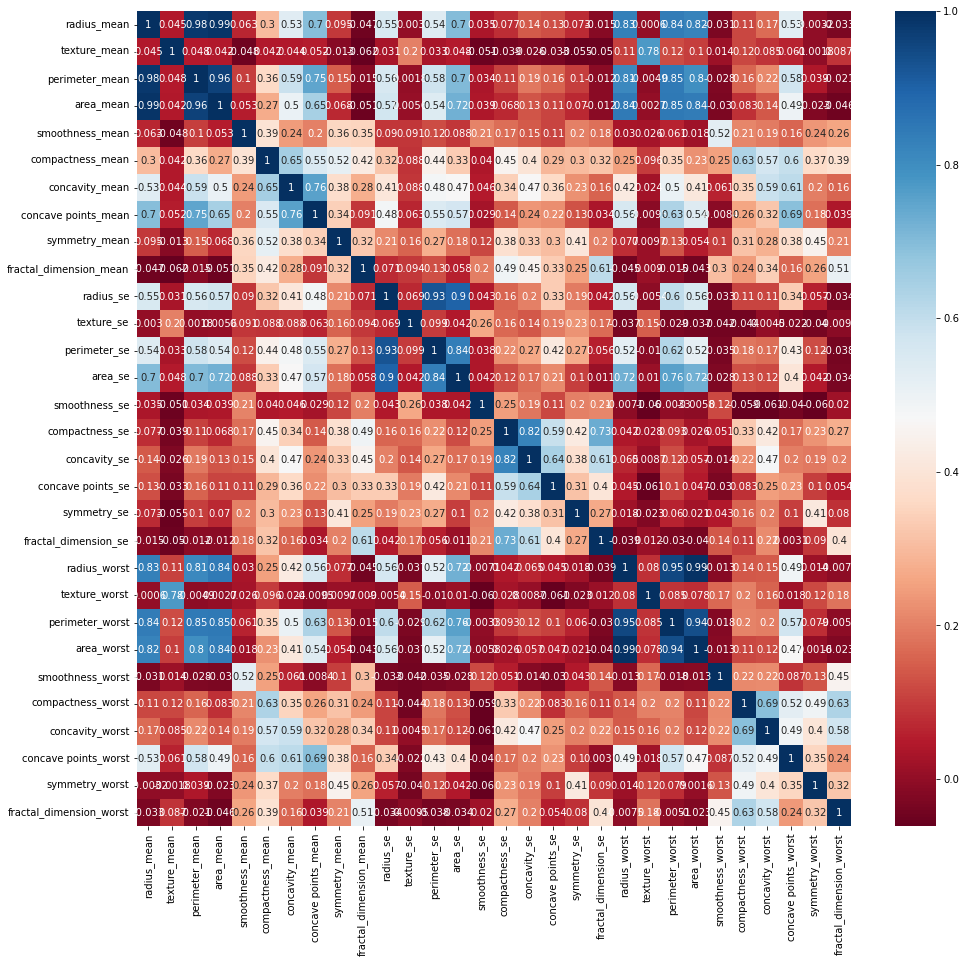

In [111]:
plt.figure(figsize=(16,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Handling MultiCollinearity

In [112]:
def high_corr(data, thresh):
    res = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.add(corr.columns[i])
    return list(res)

multicoll_cols = high_corr(df1,0.9)
print(multicoll_cols)
print(len(multicoll_cols))

['perimeter_se', 'area_worst', 'area_se', 'perimeter_mean', 'perimeter_worst', 'area_mean']
6


In [113]:
df2 = df1.copy()
df2.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,19.8548,25.4312,131.156,1232.24,0.118400,0.240688,0.300100,0.147100,0.241900,...,25.3800,34.4372,184.600,2019.0,0.164492,0.665600,0.711900,0.258652,0.460100,0.118900
1,M,20.5700,25.4312,132.900,1326.00,0.116112,0.186912,0.213556,0.108448,0.219248,...,24.9900,34.4372,161.312,1956.0,0.164492,0.478836,0.606416,0.215024,0.369168,0.109048
2,M,19.8548,25.4312,131.156,1232.24,0.116112,0.186912,0.213556,0.127900,0.219248,...,24.2592,34.4372,161.312,1771.2,0.164492,0.478836,0.606416,0.243000,0.369168,0.109048


In [114]:
df2.drop(multicoll_cols,axis=1,inplace=True)
print(len(df2.columns))
print(df2.columns)

25
Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
lb = LabelEncoder()
df2['diagnosis'] = lb.fit_transform(df2['diagnosis'])

In [117]:
df2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [118]:
df2.dtypes.value_counts()

float64    24
int64       1
dtype: int64

### We will now train models:

In [119]:
x = df2.drop('diagnosis',axis=1)
y = df2['diagnosis']
print(x.shape)
print(y.shape)

(569, 24)
(569,)


In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 24)
(143, 24)
(426,)
(143,)


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [122]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,color='blue')
    plt.plot([0,1],[0,1],label='TPR=FPR',linestyle=':',color='black')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=8)
    plt.grid()
    plt.show()

### Feature Selection

Training score 0.8568075117370892
Testing score 0.8321678321678322
Accuracy_Score 0.8321678321678322
Confusion Matrix
 [[86  4]
 [20 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        90
           1       0.89      0.62      0.73        53

    accuracy                           0.83       143
   macro avg       0.85      0.79      0.81       143
weighted avg       0.84      0.83      0.82       143

AUC Score 0.8394129979035639


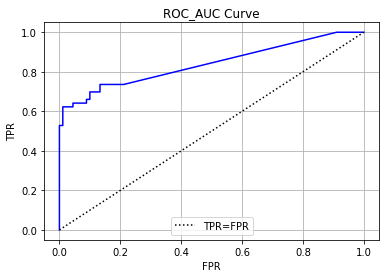

In [123]:
m1 = RandomForestClassifier(n_estimators=120,criterion='gini',
                            max_depth=12,min_samples_split=15)
gen_metrics(m1,x_train,x_test,y_train,y_test)

In [124]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_*100})
fimp_m1.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
16,radius_worst,13.365080
22,symmetry_worst,13.276273
8,radius_se,12.188680
0,radius_mean,11.913365
19,compactness_worst,6.662809
21,concave points_worst,6.305958
5,concave points_mean,5.599065
18,smoothness_worst,5.047034
4,concavity_mean,4.167897
3,compactness_mean,3.079439


In [125]:
df3=df2.copy()
df3.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [126]:
df3.drop(['fractal_dimension_se','compactness_se'
,          'fractal_dimension_mean','symmetry_mean','texture_se',
         'concavity_se'],axis=1,inplace=True)

In [127]:
df3.shape

(569, 19)

## Building Supervised Models:

In [128]:
x = df3.drop('diagnosis',axis=1)
y = df3['diagnosis']
print(x.shape)
print(y.shape)
print(x.columns)

(569, 18)
(569,)
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'smoothness_se',
       'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 18)
(143, 18)
(426,)
(143,)


### Logistic Regression-1

Training score 0.7300469483568075
Testing score 0.7132867132867133
Accuracy_Score 0.7132867132867133
Confusion Matrix
 [[87  3]
 [38 15]]
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.97      0.81        90
           1       0.83      0.28      0.42        53

    accuracy                           0.71       143
   macro avg       0.76      0.62      0.62       143
weighted avg       0.75      0.71      0.67       143

AUC Score 0.7939203354297694


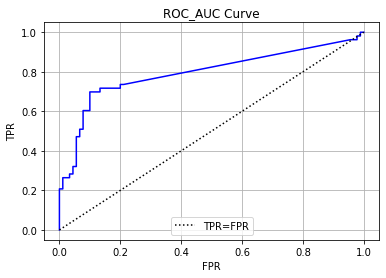

In [130]:
log_reg = LogisticRegression(max_iter=100)
gen_metrics(log_reg,x_train,x_test,y_train,y_test)
y_pred_log_reg = log_reg.predict(x_test)

### Tabulating Result:

In [131]:
models = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy",'F-1 Score','AUC Score'])
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score


In [132]:
from sklearn import metrics

In [133]:
new_row = {"Model": "Logistic Regression",
            "Precision": metrics.precision_score(y_test,y_pred_log_reg), 
            "Recall": metrics.recall_score(y_test,y_pred_log_reg), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_log_reg), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_log_reg),
          'AUC Score':roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.79392


### SGD

In [134]:
from sklearn.linear_model import SGDClassifier

Training score 0.6267605633802817
Testing score 0.6293706293706294
Accuracy_Score 0.6293706293706294
Confusion Matrix
 [[90  0]
 [53  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        90
           1       0.00      0.00      0.00        53

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143

AUC Score 0.6249475890985324


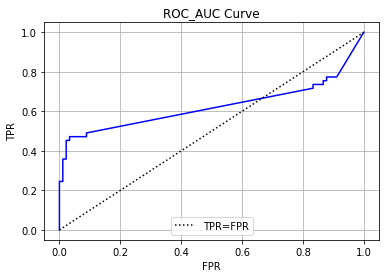

In [135]:
sgd = SGDClassifier(random_state= 20,loss='log')
gen_metrics(sgd,x_train,x_test,y_train,y_test)
y_pred_sgd = sgd.predict(x_test)

In [136]:
new_row = {"Model": "SGD Model",
            "Precision": metrics.precision_score(y_test,y_pred_sgd), 
            "Recall": metrics.recall_score(y_test,y_pred_sgd), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_sgd), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_sgd),
          'AUC Score':roc_auc_score(y_test,sgd.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948


### Decision Tree

Training score 0.8497652582159625
Testing score 0.8181818181818182
Accuracy_Score 0.8181818181818182
Confusion Matrix
 [[86  4]
 [22 31]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        90
           1       0.89      0.58      0.70        53

    accuracy                           0.82       143
   macro avg       0.84      0.77      0.79       143
weighted avg       0.83      0.82      0.81       143

AUC Score 0.789412997903564


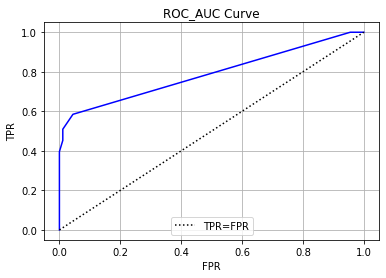

In [137]:
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=23,max_depth=8)
gen_metrics(dt,x_train,x_test,y_train,y_test)
y_pred_dt = dt.predict(x_test)

In [138]:
new_row = {"Model": "Decision Tree Model",
            "Precision": metrics.precision_score(y_test,y_pred_dt), 
            "Recall": metrics.recall_score(y_test,y_pred_dt), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_dt), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_dt),
          'AUC Score':roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948
2,Decision Tree Model,0.885714,0.584906,0.818182,0.704545,0.789413


### Random Forest

Training score 0.8474178403755869
Testing score 0.8321678321678322
Accuracy_Score 0.8321678321678322
Confusion Matrix
 [[86  4]
 [20 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        90
           1       0.89      0.62      0.73        53

    accuracy                           0.83       143
   macro avg       0.85      0.79      0.81       143
weighted avg       0.84      0.83      0.82       143

AUC Score 0.8406708595387841


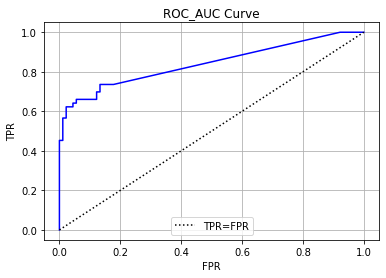

In [139]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=1000,min_samples_split=25,max_depth=8)
gen_metrics(rf,x_train,x_test,y_train,y_test)
y_pred_rf = rf.predict(x_test)

In [140]:
new_row = {"Model": "Random Forest Model",
            "Precision": metrics.precision_score(y_test,y_pred_rf), 
            "Recall": metrics.recall_score(y_test,y_pred_rf), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_rf), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_rf),
          'AUC Score':roc_auc_score(y_test,rf.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948
2,Decision Tree Model,0.885714,0.584906,0.818182,0.704545,0.789413
3,Random Forest Model,0.891892,0.622642,0.832168,0.733333,0.840671


### XGBoost

In [141]:
from xgboost import XGBClassifier

Training score 0.8685446009389671
Testing score 0.8461538461538461
Accuracy_Score 0.8461538461538461
Confusion Matrix
 [[88  2]
 [20 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.98      0.89        90
           1       0.94      0.62      0.75        53

    accuracy                           0.85       143
   macro avg       0.88      0.80      0.82       143
weighted avg       0.86      0.85      0.84       143

AUC Score 0.8414046121593292


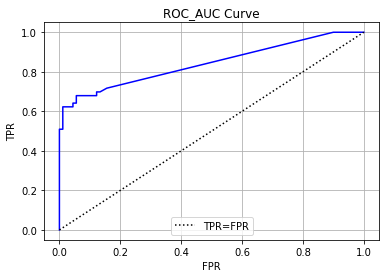

In [142]:
xg= XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                   n_estimators=100,reg_lambda=1,eta=0.5,gamma=0.5,
                   use_label_encoder=False)
gen_metrics(xg,x_train,x_test,y_train,y_test)
y_pred_xg = xg.predict(x_test)

In [143]:
new_row = {"Model": "XGBoost Model",
                "Precision": metrics.precision_score(y_test,y_pred_xg), 
            "Recall": metrics.recall_score(y_test,y_pred_xg), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_xg), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_xg),
          'AUC Score':roc_auc_score(y_test,xg.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948
2,Decision Tree Model,0.885714,0.584906,0.818182,0.704545,0.789413
3,Random Forest Model,0.891892,0.622642,0.832168,0.733333,0.840671
4,XGBoost Model,0.942857,0.622642,0.846154,0.750000,0.841405


### GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [145]:
import time
import datetime as dt

In [146]:
print(dt.datetime.now())

2022-07-25 22:17:33.423998


In [147]:
hparams_xgb = {'n_estimators':[75,100,125,150],
               'reg_lambda': [0.5,0.7,0.8,1],
                'eta':[0.3,0.5,0.7],
               'gamma': [0.5,1,1.5]}
print(hparams_xgb)

{'n_estimators': [75, 100, 125, 150], 'reg_lambda': [0.5, 0.7, 0.8, 1], 'eta': [0.3, 0.5, 0.7], 'gamma': [0.5, 1, 1.5]}


Training score 0.8685446009389671
Testing score 0.8321678321678322
Accuracy_Score 0.8321678321678322
Confusion Matrix
 [[87  3]
 [21 32]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.91      0.60      0.73        53

    accuracy                           0.83       143
   macro avg       0.86      0.79      0.80       143
weighted avg       0.85      0.83      0.82       143

AUC Score 0.8270440251572326


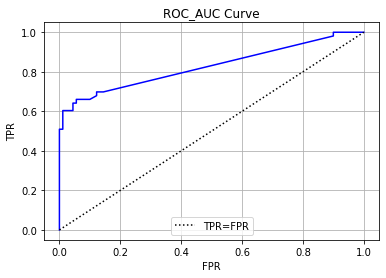

Time elapsed is 44.32905435562134 sec


In [148]:
st = time.time()
xgb2 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                    use_label_encoder=False)
gs1 = GridSearchCV(xgb2,param_grid=hparams_xgb,scoring='accuracy')
gen_metrics(gs1,x_train,x_test,y_train,y_test)
y_pred_xg1 = gs1.predict(x_test)
et = time.time()
print(f'Time elapsed is {et-st} sec')

In [149]:
print(gs1.best_params_)
print(gs1.best_estimator_)

{'eta': 0.5, 'gamma': 0.5, 'n_estimators': 75, 'reg_lambda': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.5,
              eval_metric='logloss', gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)


In [150]:
new_row = {"Model": "XGBoost Optimised Model",
                "Precision": metrics.precision_score(y_test,y_pred_xg1), 
            "Recall": metrics.recall_score(y_test,y_pred_xg1), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_xg1), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_xg1),
          'AUC Score':roc_auc_score(y_test,gs1.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948
2,Decision Tree Model,0.885714,0.584906,0.818182,0.704545,0.789413
3,Random Forest Model,0.891892,0.622642,0.832168,0.733333,0.840671
4,XGBoost Model,0.942857,0.622642,0.846154,0.750000,0.841405
5,XGBoost Optimised Model,0.914286,0.603774,0.832168,0.727273,0.827044


### AdaBoost Classfier

In [151]:
from sklearn.ensemble import AdaBoostClassifier

Training score 0.9014084507042254
Testing score 0.8391608391608392
Accuracy_Score 0.8391608391608392
Confusion Matrix
 [[87  3]
 [20 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.92      0.62      0.74        53

    accuracy                           0.84       143
   macro avg       0.86      0.79      0.81       143
weighted avg       0.85      0.84      0.83       143

AUC Score 0.7870020964360588


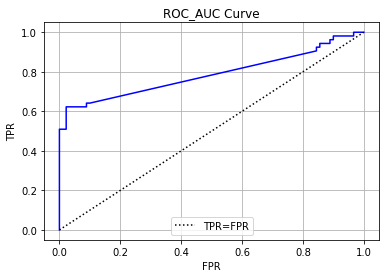

In [152]:
dt1 = DecisionTreeClassifier(max_depth=1)
ada= AdaBoostClassifier(dt1,n_estimators=100,learning_rate=1)
gen_metrics(ada,x_train,x_test,y_train,y_test)
y_pred_ada = ada.predict(x_test)

In [153]:
new_row = {"Model": "AdaBoost Model",
                "Precision": metrics.precision_score(y_test,y_pred_ada), 
            "Recall": metrics.recall_score(y_test,y_pred_ada), 
            "Accuracy": metrics.accuracy_score(y_test,y_pred_ada), 
            "F-1 Score": metrics.f1_score(y_test,y_pred_ada),
          'AUC Score':roc_auc_score(y_test,ada.predict_proba(x_test)[:,1])}
models = models.append(new_row,ignore_index=True)
models

,Model,Precision,Recall,Accuracy,F-1 Score,AUC Score
0,Logistic Regression,0.833333,0.283019,0.713287,0.422535,0.793920
1,SGD Model,0.000000,0.000000,0.629371,0.000000,0.624948
2,Decision Tree Model,0.885714,0.584906,0.818182,0.704545,0.789413
3,Random Forest Model,0.891892,0.622642,0.832168,0.733333,0.840671
4,XGBoost Model,0.942857,0.622642,0.846154,0.750000,0.841405
5,XGBoost Optimised Model,0.914286,0.603774,0.832168,0.727273,0.827044
6,AdaBoost Model,0.916667,0.622642,0.839161,0.741573,0.787002


### Conclusion
- XGBoost Model & Random Forest Model are performing better